## Лабораторная работа №3 (дополнительно)


### Часть 2

#####  Создайте массив единиц размерностью 5х2, с целочисленным типом данных.

In [2]:
import numpy as np

In [3]:
# массив (двумерный) единиц
np.ones((5,2), dtype=int)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

##### Создайте 2 массива единиц A и B размерностью 2х3. Массив B транспонируйте. Выполните операцию матричного перемножения массивов A и B (транспонированный).

In [8]:
A = np.ones((2,3))
B = np.ones((2,3)).T
print('Транспонированная матрица B:\n', B)
print('Матричное умножение:\n', A @ B)

Транспонированная матрица B:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
Матричное умножение:
 [[3. 3.]
 [3. 3.]]


##### Создайте массив случайных значений от 0 до 10, размерностью 20. Используя логическую индексацию, выведите массив со значениями больше 5.

In [9]:
# Создание массива случайных значений от 0 до 10 размерностью 20
array = np.random.randint(0, 11, 20)

# Логическая индексация для вывода значений больше 5
result = array[array > 5]

print(result)

[8 8 7 9 6 7 8 9]


##### Создайте массив случайных значений от 0 до 10, размерностью 3х5. При помощи функции np.where() замените значения меньше 5 на 0 и значения больше или равно 5 на 1.

In [10]:
# Создание массива случайных значений от 0 до 10 размерностью 20
arr = np.random.randint(0, 11, (3,5))

# Замена значений меньше 5 на 0 и значений больше или равно 5 на 1
res = np.where(arr < 5, 0, 1)

print(res)

[[0 1 0 0 1]
 [1 1 0 0 0]
 [1 1 1 1 1]]


##### Создайте массив единиц размерностью 4х3. Добавьте 1 ось в любое место массива.

In [14]:
# массив (двумерный) единиц
a = np.ones((4,3), dtype=int)
a.shape

(4, 3)

In [16]:
# добавим ось
print(np.expand_dims(a, 2))
# проверим размерность
np.expand_dims(a, 0).shape

[[[1]
  [1]
  [1]]

 [[1]
  [1]
  [1]]

 [[1]
  [1]
  [1]]

 [[1]
  [1]
  [1]]]


(1, 4, 3)

##### Напишите код, который вычисляет значение следующей математической функции в зависимости от переменной х, где х - вектор

##### F(x)=125AATx+Bx+5 

##### 1. Создайте матрицы A и B размера 4 на 4, состоящие из случайных целых чисел в интервале от 1 до 10 (используйте соответствующую функцию модуля np.random)
##### 2.Создайте вектор х размера 4, состоящие из случайных целых чисел в интервале от 1 до 5
##### 3. Перемножение матриц, и матрицы на вектор должно быть матричное.

In [18]:
# Создание матриц A и B
A = np.random.randint(1, 11, (4, 4))
B = np.random.randint(1, 11, (4, 4))

# Создание вектора x
x = np.random.randint(1, 6, 4)

# Вычисление значения функции F(x)
F = 125 * np.dot(np.dot(A, A.T), x) + np.dot(B, x) + 5

print(F)

[177609 179536 180090 234870]


##### Напишите функцию, которая находит все точки пересечения заданной одномерной математической функции с осью X и отображает их на графике функции красными кругами.

Функция
def f3(x):
  y = x*x*np.sin(x/300) + 300*x
  return y

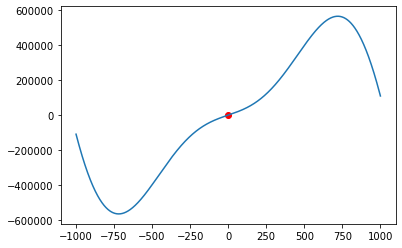

In [22]:
import matplotlib.pyplot as plt

# Функция
def f3(x):
    y = x*x*np.sin(x/300) + 300*x
    return y

# Нахождение точек пересечения с осью X
def find(func):
    inter = []
    for i in range(len(x)-1):
        if func(x[i])*func(x[i+1]) < 0:
            root = (x[i] - x[i+1]) / (func(x[i]) - func(x[i+1])) * func(x[i]) + x[i]
            inter.append(root)
    return inter

x = np.linspace(-1000, 1000, 1000)
y = f3(x)

inter = find(f3)

plt.plot(x, y)
plt.scatter(inter, [0]*len(inter), color='red', marker='o')
plt.show()

##### Напишите функцию, которая получает на вход пару матриц и проверяет закон коммутативности матричного умножения, то есть свойства  A∗B=B∗A , возвращая 1 в случае подтверждения и 0 в противном случае. Поставьте 1000 экспериментов для случайных целочисленных матриц размера (5,5) элементов, которые принадлежат отрезку [-5,5], и найдите количество успешных срабатываний.

In [26]:
# проверка коммутативности
def commutativity(A, B):
    result1 = np.dot(A, B)
    result2 = np.dot(B, A)
    
    return np.array_equal(result1, result2)

In [27]:
trials = 0
num_trials = 1000

for _ in range(num_trials):
    A = np.random.randint(-5, 6, (5, 5))
    B = np.random.randint(-5, 6, (5, 5))
    
    if commutativity(A, B):
        trials += 1

print(commutativity(A,B))
print("Количество успешных срабатываний: ", trials)


False
Количество успешных срабатываний:  0


### Часть 3

##### Напишите функцию, которая находит две точки: где наклон графика функции самый крутой (в любую сторону), где наклон самый пологий, и отображает на графике функции эти точки зелёным и красным кругом соответственно.

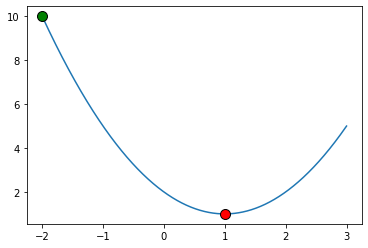

In [30]:
def points(func, x_range):
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = func(x)
    slopes = np.gradient(y, x)
    max_slope = np.argmax(np.abs(slopes))
    min_slope = np.argmin(np.abs(slopes))
    
    max_slope_point = (x[max_slope], y[max_slope])
    min_slope_point = (x[min_slope], y[min_slope])
    
    plt.plot(x, y)
    plt.scatter(max_slope_point[0], max_slope_point[1], color='green', s=100, edgecolors='black', zorder=5)
    plt.scatter(min_slope_point[0], min_slope_point[1], color='red', s=100, edgecolors='black', zorder=5)
    plt.show()

# Пример функции 
def my_func(x):
    return x**2 - 2*x + 2

points(my_func, (-2, 3))

##### Напишите функцию, которая находит все экстремумы двумерной функции z = sin(x) * sin(y) в диапазоне [x = -3.14, x = 3.14], [y = -3.14, y = 3.14], а также:

##### a) Возвращает листы с координатами двумерных точек - 4 листа - локальный и глобальный минимум и максимум.

##### b) Выводит график такой функции.

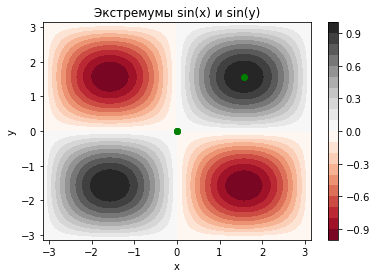

[array([0., 0.]),
 array([6.81894605e-06, 6.81894605e-06]),
 array([1.57079654, 1.57079654]),
 array([0., 0.])]

In [34]:
from scipy.optimize import minimize

def func(xy):
    x, y = xy
    z = np.sin(x) * np.sin(y)
    return z

def extremums():
    x = np.linspace(-3.14, 3.14, 100)
    y = np.linspace(-3.14, 3.14, 100)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    min_global = minimize(func, [0, 0]).x
    min_local = minimize(func, [-1, -1]).x
    max_local = minimize(lambda xy: -func(xy), [1, 1]).x
    max_global = minimize(lambda xy: -func(xy), [0, 0]).x

    plt.figure()
    plt.contourf(X, Y, Z, levels=20, cmap='RdGy')
    plt.colorbar()
    plt.scatter([min_global[0], min_local[0], max_local[0], max_global[0]], [min_global[1], min_local[1], max_local[1], max_global[1]], color='green', marker='o')
    plt.title('Экстремумы sin(x) и sin(y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return [min_global, min_local, max_local, max_global]

extremums()